## ARIMA

- Do 'pip install pmdarima'. https://alkaline-ml.com/pmdarima/setup.html#setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

In [15]:
bike = pd.read_csv('https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/bike-sharing-daily.csv')
bike = bike[['dteday','cnt']]
bike.columns = ['dteday','raw']
bike['dteday'] = pd.to_datetime(bike['dteday'], format='%Y-%m-%d')
bike.index = bike['dteday']
bike = bike.drop('dteday',axis=1)
bike

,raw
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


In [7]:
from pmdarima import model_selection
train, test = model_selection.train_test_split(bike, train_size=100)

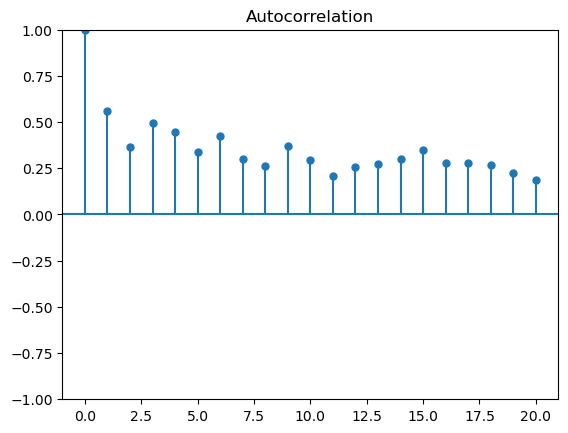

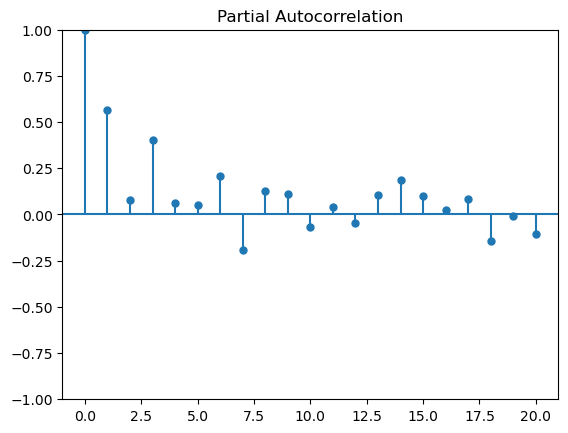

In [10]:
import pmdarima as pm
# Compute an auto-correlation:
pm.acf(train)
# Plot an auto-correlation:
pm.plot_acf(train)
pm.plot_pacf(train)



In [28]:
import numpy as np
import pmdarima as pm

# fit stepwise auto-ARIMA
arima = pm.auto_arima(train, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise
arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1407.557, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1377.945, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1406.137, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1367.773, Time=0.45 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1363.687, Time=0.70 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=1.66 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=1366.973, Time=0.55 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.43 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=1.18 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=inf, Time=2.10 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -676.843
Date:                              Fri, 11 Nov 2022   AIC                           1363.687
Time:                                      14:35:20   BIC                           1376.016
Sample:                                  01-01-2011   HQIC                          1368.651
                                       - 04-10-2011                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2498      0.114     -2.194      0.028      -0.473      -0.027
ar.S.L12      -0.3260      0.290     -1.123      0.262      -0.895       0.243
ar.S.L24      -0.1639      0.220     -0.745      0.456      -0.595       0.267
ma.S.L12      -0.7105      0.326     -2.181      0.029      -1.349      -0.072
sigma2      2.923e+05   5.13e+04      5.702      0.000    1.92e+05    3.93e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.37   Prob(JB):                         0.11
Heteroskedasticity (H):               1.83   Skew:                            -0.55
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

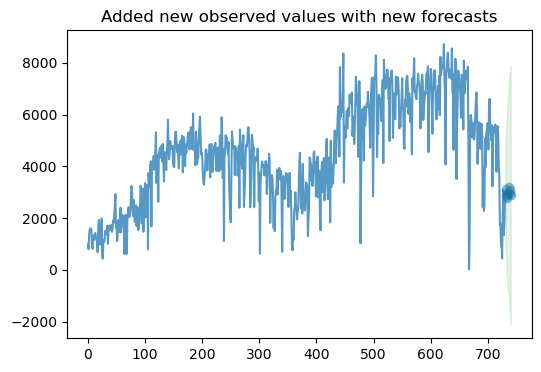

In [29]:
# Now plot the results and the forecast for the test set
preds, conf_int = arima.predict(n_periods=test.shape[0],
                                return_conf_int=True)
fig, ax = plt.subplots(figsize=(6, 4))

# Now add the actual samples to the model and create NEW forecasts
arima.update(test)
new_preds, new_conf_int = arima.predict(n_periods=10, return_conf_int=True)
new_x_axis = np.arange(bike.shape[0] + 10)


ax.plot(new_x_axis[:bike.shape[0]], bike, alpha=0.75)
ax.scatter(new_x_axis[bike.shape[0]:], new_preds, alpha=0.4, marker='o')
ax.fill_between(new_x_axis[-new_preds.shape[0]:],
                     new_conf_int[:, 0],
                     new_conf_int[:, 1],
                     alpha=0.1, color='g')
ax.set_title("Added new observed values with new forecasts")
plt.show()